In [2]:
import numpy as np
import scipy.interpolate as sp_inter
import matplotlib.pyplot as plt
from typing import Callable

In [3]:
%matplotlib notebook

# Problem 1 - Newman 6.11

## parts (b) & (c)

In [26]:
def overrelaxation_method(f, df, x0, w=0, err=1e-6):
    x = x0
    xx = (1+w)*f(x) - w*x
    _factor = (1 + w)*df(x) - w
    error = (xx - x)*_factor/(_factor - 1)
    N = 1
    while error > err:
        N += 1
        x = xx
        xx = (1+w)*f(x) - w*x
        _factor = (1 + w)*df(x) - w
        error = (xx - x)/(1 - 1/_factor)
    return xx, N

In [54]:
func = lambda x: 1 - np.exp(-2*x)
dfunc = lambda x: 2*np.exp(-2*x)

<IPython.core.display.Javascript object>


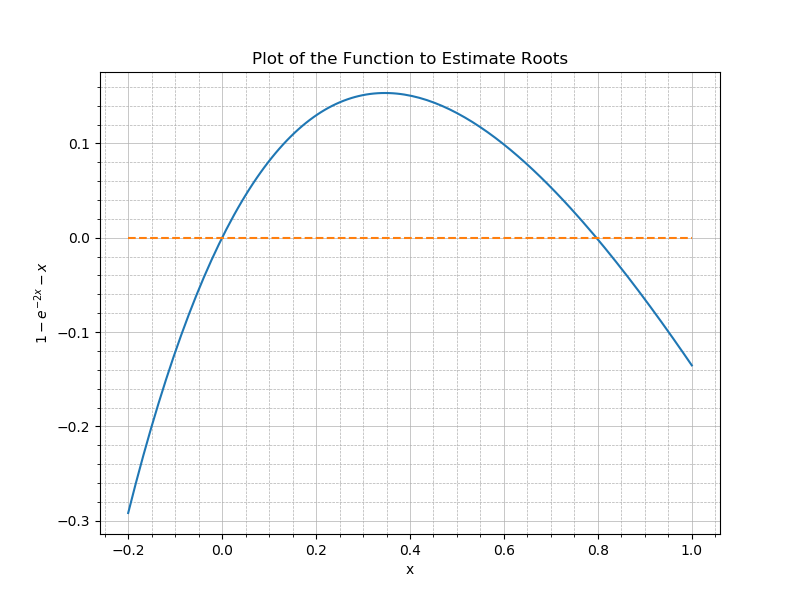

In [62]:
xvals = np.linspace(-0.2, 1, num=150, dtype=np.single)
    
fig = plt.figure()
fig.set_size_inches(8,6)
ax = fig.add_subplot()
ax.plot(xvals, func(xvals) - xvals)
ax.plot(xvals, 0*xvals, '--')
ax.set_xlabel("x")
ax.set_ylabel("$1 - e^{-2x} - x$")
ax.set_title("Plot of the Function to Estimate Roots")
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(True, which='major', linestyle='-', linewidth='0.5')
ax.grid(True, which='minor', linestyle='--', linewidth='0.5')

In [70]:
overrelaxation_method(func, dfunc, 1, 0)

(0.7968126311118457, 14)

In [71]:
overrelaxation_method(func, dfunc, 1, 0.3)

(0.7968129417786927, 8)

# Problem 2 - Newman 6.13

## part (b)

In [34]:
def binary_search(f, x1, x2, err=1e-6):
    if np.sign(f(x1)) == np.sign(f(x2)):
        return "Failed to give proper initial estimate"
    error = np.abs(x1 - x2)
    while error > err:
        xx = 0.5 * (x1 + x2)
        if np.sign(f(xx)) == np.sign(f(x1)):
            x1 = xx
        else:
            x2 = xx
        error = np.abs(x1 - x2)
    return 0.5 * (x1 + x2)

In [73]:
func = lambda x: 5*np.exp(-x) + x - 5

<IPython.core.display.Javascript object>


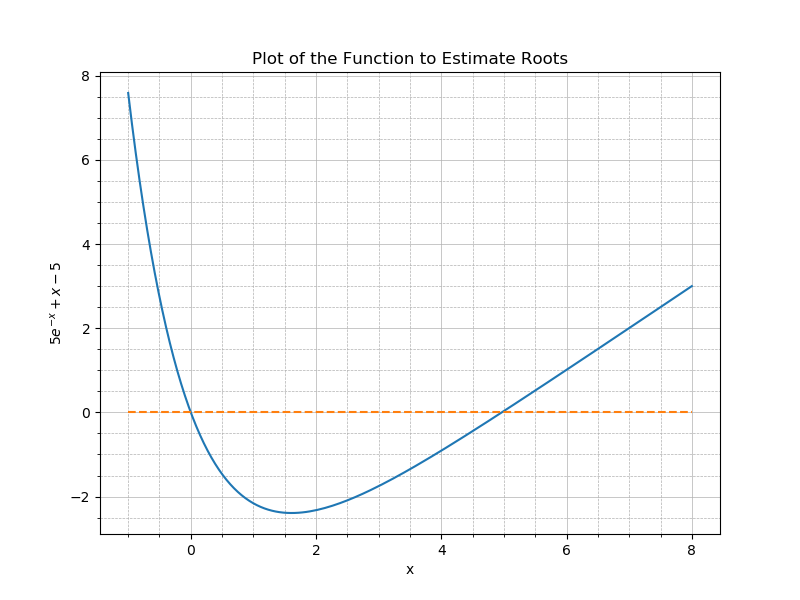

In [53]:
xvals = np.linspace(-1, 8, num=150, dtype=np.single)
    
fig = plt.figure()
fig.set_size_inches(8,6)
ax = fig.add_subplot()
ax.plot(xvals, func(xvals))
ax.plot(xvals, 0*xvals, '--')
ax.set_xlabel("x")
ax.set_ylabel("$5e^{-x} + x - 5$")
ax.set_title("Plot of the Function to Estimate Roots")
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(True, which='major', linestyle='-', linewidth='0.5')
ax.grid(True, which='minor', linestyle='--', linewidth='0.5')

In [37]:
# Define constants but combine powers based on the fraction to be calculated
c = 299792458
h = 6.62606896e-11
k = 1.3806504
a = h*c / k

In [74]:
x_root = binary_search(func, 4, 6)
x_root

4.965114116668701

In [75]:
b = a / x_root
print("Estimate of Wien displacement constant is b={:.8f}".format(b))

Estimate of Wien displacement constant is b=0.00289777


## part (c)

we have $T  = \frac{b}{T}$ so for us this gives

In [83]:
print("Estimated surface temperature of the sun is {:.2f} Kelvin".format(b / 502e-9))

Estimated surface temperature of the sun is 5772.45 Kelvin


# Problem 3